<h1 style="display:flex; justify-content:center; font-size: 40px">🎓 JUNIOR</h1>

In [2]:
import numpy as np
np.random.seed(0)
N = 20
# def get_X_y(N = 100):
#   a, b = 0, 10
#   mid = (a + b) / 2
#   X = np.random.randint(0, 10, N).reshape(-1, 1)
#   # y = np.random.randint(0, 10, N)
#   y = (X.T[0] > mid).astype(float)
#   return X, y

def get_X(a=0, b=10, N = 100):
  return np.random.randint(a, b, N).reshape(-1, 1)

def get_y_lt_avg(X:np.ndarray):
  mid = (X.min() + X.max()) / 2
  return (X.T[0] > mid).astype(float)

X = get_X(N=N)
y = get_y_lt_avg(X=X)
X.T, y

(array([[5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, 6, 7, 7, 8, 1]]),
 array([1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0.]))

## DONE

In [20]:
# 1. Explain how logistic regression works.
# Builds sigmoid on data, trying to fit sigmoid to minimize misclassification of points.
# X, y = TODO

# 2. Why is clustering needed? How does it work?
# show "closeness" between points - automatically group together data point closest to each other
#   N clusters placed randomly in feature space. 
#   cluster center calculated from intersect edges with other clusters
#   cluster center moves towards center of groups points
import numpy as np
import matplotlib.pyplot as plt
N_points = 100
np.random.seed(42)
X, y = get_X_y(N_points)
N_clusters = 3
cluster_centers = np.array(list(zip(np.random.randint(0, 10, N_clusters), np.random.randint(0, 10, N_clusters))))
# print("X:", X, "y:", y)
# plt.scatter(X, y, c="blue")
# plt.scatter(x=cluster_centers[:, 0], y=cluster_centers[:, 1], c="red")
# plt.show()
# for i in range(10):
# TODO

# 3. What algorithms are used for data clustering? What is the main idea of ​​each of them? How does the K-means algorithm work?
# K-means, k-nearest-neighbors
# TODO

# 4. What is Precision/Recall?
# precision is a measure of how many where predicted correctly True/False from all predicted True/False
# recall is how many points from all of points in a feature space was covered
actual, predicted = np.random.randint(0, 2, 10), np.random.randint(0, 2, 10)
a_p_zip = list(zip(actual, predicted))
print(actual, predicted)
TP, TN, FP, FN = a_p_zip.count((1,1)), a_p_zip.count((0,0)), a_p_zip.count((0,1)), a_p_zip.count((1,0))
print(TP, TN, FP, FN)
precision = TP / (TP + FP)
recall    = (TP + FP) / (TP + TN + FP + FN)
accuracy  = (TP + TN) / (TP + TN + FP + FN)
print(precision, recall, accuracy)

# 5. What is the difference between Accuracy, Precision and Recall? Give examples of when you should use each of them.
# cancer prediction - high precision
# recommendation system - high recall

[1 0 1 0 1 0 0 0 1 1] [0 1 0 0 1 1 0 1 1 0]
2 2 3 3
0.4 0.5 0.4


In [ ]:
# 6. What is validation? What is it needed for?
# validation is an intermidiate training step to run data throught current weights and 
# evaluate model error without updating weights
import torch
class MyNN(torch.nn.Module):
  def __init__(self):
    super(MyNN, self).__init__()
    self.fc1 = torch.nn.Linear(100, 10)
  def forward(self, x):
    return self.fc1(x)
model = MyNN()
model.train()
# . . .
model.eval()

# 7. Why are validation and test datasets needed? Why is just one of them not enough?
# test is dataset which model never sees prior to prediction, it's used to test the model performance
# validation on the other hand is used in the training loop as an intermediate check of model error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
dataset = torch.Tensor([[1,2,3]])
X_train, X_test, y_train, y_test = train_test_split(dataset, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X=X_train, y=y_train, test_size=0.2)
xx = cross_val_score(estimator=svm.SVC(), X=X_train, y=y_train)

# 8. What is the correct validation process?
# train step - validation step - . . .
# or cross-validation splits of dataset, where 10% of dataset is excluded and 
# model is trained on other 90% and then validated on 10% validation
xx = cross_val_score(estimator=svm.SVC(), X=X_train, y=y_train)

# 9. What metrics do you know for evaluating the quality of models?
# presicion, recall, accuracy
# F1 score - trade-off of precision and recall: 2 p*r/p+r 
# ROC/AUC curve - TODO

# 10. What metrics should be used for unbalanced classes?
# F1 score
# Calculate F1 score for unbalanced classes
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='weighted')


In [159]:
# 11. What is Bias Variance Tradeoff?
# model balances between being overly focused on data on which it was trained 
# and perform poorly on any other data (Bias). on the other side it may fail 
# learning patterns at all and perform poorly on any data (Variance)
# finding balance is key
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
y = 2 * (X ** 2) - 3 * X + 4 + np.random.randn(20, 1) * 10
poly = PolynomialFeatures(2)
model = LinearRegression()
model.fit(poly.fit_transform(X), y)
X_fit = np.linspace(X.min(), X.max(), N).reshape(-1, 1).astype(np.int64)
y_fit = model.predict(poly.transform(X_fit)).astype(np.int64)
X_sorted: np.ndarray = X.reshape(1, -1)[0]
X_sorted.sort()
X_sorted = X_sorted.reshape(-1, 1)
# fig, axs = plt.subplots(1, 2)
# fig.set_figwidth(16)
# fig.set_figheight(2)
# axs[0].scatter(X, y, color='red')
# axs[1].scatter(X, y, color='red')
# axs[0].set_title("underfit")
# axs[0].plot(X_fit, y_fit, color='blue')
# axs[1].set_title("overfit")
# axs[1].plot(X_sorted, y, color='blue')
# fig.show()

# 12. What is regularization? What regularization methods do you know?
# L1 Lasso regularization add a lambda term * parameter which prevents high contrast among params
# L2 Ridge regularization is same but instead of ^2 it uses abs so param can be zeroed
from sklearn.linear_model import Lasso, Ridge
l1 = Lasso()
l2 = Ridge()

# 13. Is it possible to use linear regression for classification tasks? Why?
# yes, because linear regression builds an N-D line which best fits space of entries
# thus we can introduce a threashold and say that first half of the line is class A, other - class B
lin_reg = LinearRegression()
y_pred = lin_reg.fit(X, y).predict(X)
# fig, axs = plt.subplots(1, 2)
# fig.set_figwidth(16)
# fig.set_figheight(2)
# axs[0].scatter(X, y, color='red')
# axs[1].scatter(X, y, color='red')
# axs[0].set_title("underfit")
# axs[0].plot(X, y_pred, color='blue')
# axs[1].set_title("overfit")
# axs[1].plot(X_sorted, y, color='blue')
# fig.show()

# 14. Describe the problem of machine learning from the point of view of probability theory. Explain the principle of empirical risk minimization.
# TODO

# 15. What methods do you know for working with categorical data?
# one-hot encoding, where we create a sparse matrix for N categories of N columns 
# and put 1 in corresponding column
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df = pd.DataFrame({})
hotenc = OneHotEncoder()
# hotenc.fit(df['category_column'])
# df['category_column'].get_dummies()

# 16. How to understand that your model is overfitted? And what indicates that she is underfitted?
# overfitted - good performance on train/valid data, bad on test
# underfitted - bad performance throughtout all datasets
# same code as 11

# 17. Tell me how decision trees work? What are the disadvantages? How to fight overfit?
# decision tree segments data by making splits in each dimension, 1 by 1 until reaches set depth
# disadvantages - susseptible to outliers
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X, y > y.mean())
# fig, axs = plt.subplots(1, 1)
# fig.set_figwidth(16)
# fig.set_figheight(4)
# plot_tree(tree_clf)
# fig.show()

# 18. How to ensamble models?
# you could use RandomForest which uses bagging or XGBoost which uses boosting
# bagging creates multiple trees and averages result
# stacking TODO
# boosting creates trees iteratively and remembers errors of previous trees
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# import xgboost as xgb
forest_clf = RandomForestClassifier()
stack_clf = StackingClassifier(estimators=[])

# 19. What is staking and bagging?
# bagging creates multiple trees and averages result
# stacking TODO


# 20. Why is cross-entropy loss needed? Why can't we teach classification using L2?
# ||y - Xw||^2_2 + alpha * ||w||^2_2
# L2 is normalization of weights
X, y = get_X_y(3)
w = np.array([1,2,3])
norm = lambda x:  x @ x
alpha = 0.2
l2 = norm(y - w@X) + alpha * norm(w)
print("X: ", X)
print("y: ", y)
print("w: ", w)
print("L2: ", l2)

cross_entropy = 


X:  [[3]
 [5]
 [9]]
y:  [4 4 6]
w:  [1 2 3]
L2:  3750.8


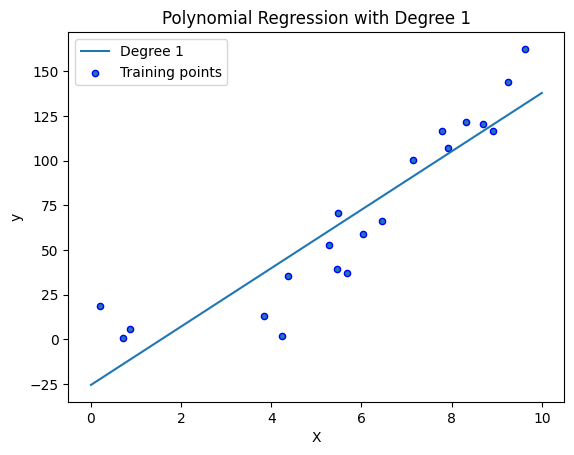

Degree 1 - Training MSE: 415.58


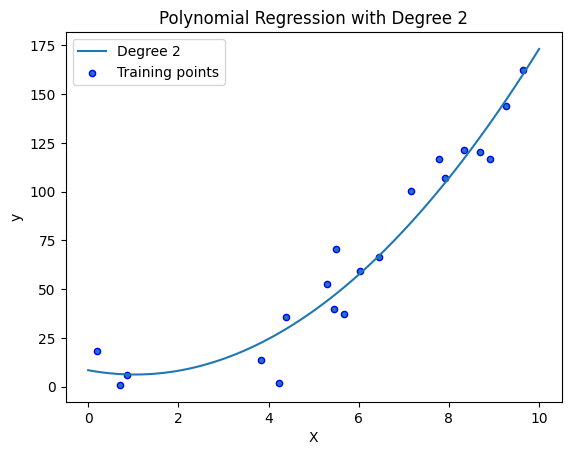

Degree 2 - Training MSE: 138.40


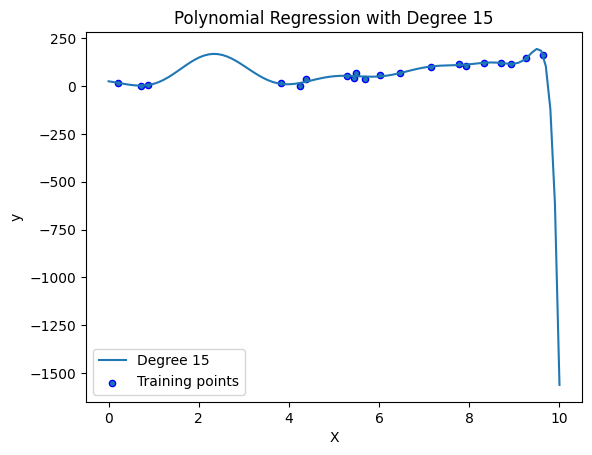

Degree 15 - Training MSE: 59.61


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(20, 1) * 10, axis=0)
y = 2 * (X ** 2) - 3 * X + 4 + np.random.randn(20, 1) * 10

# Generate a range of X values for plotting
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

# Plotting function
def plot_polynomial_regression(degree, X, y, X_plot):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    X_plot_poly = poly_features.transform(X_plot)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_plot = model.predict(X_plot_poly)
    
    plt.plot(X_plot, y_plot, label=f'Degree {degree}')
    plt.scatter(X, y, edgecolor='b', s=20, label='Training points')
    plt.title(f'Polynomial Regression with Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    y_train_pred = model.predict(X_poly)
    print(f"Degree {degree} - Training MSE: {mean_squared_error(y, y_train_pred):.2f}")

# Underfitting
plot_polynomial_regression(1, X, y, X_plot)  # Linear

# Proper fit
plot_polynomial_regression(2, X, y, X_plot)  # Quadratic

# Overfitting
plot_polynomial_regression(15, X, y, X_plot)  # High-degree polynomial


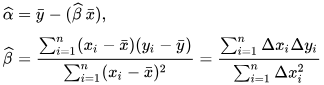

In [181]:
points = np.array([[1,3], [3,2], [8,1]])
points.mean(axis=0)

array([4., 2.])

X:
[[1 3 4]
 [1 2 5]
 [1 3 2]]
bias:
[[1.]
 [1.]
 [1.]]
X:
[[1. 1. 3. 4.]
 [1. 1. 2. 5.]
 [1. 1. 3. 2.]]
X.T @ X:
[[ 3.  3.  8. 11.]
 [ 3.  3.  8. 11.]
 [ 8.  8. 22. 28.]
 [11. 11. 28. 45.]]
X_inv:
[[ 3.68771084e+30  0.00000000e+00 -3.68771084e+30  8.18836296e+14
   4.09418148e+14]
 [-3.68771084e+30  4.50359963e+15  3.68771084e+30 -8.18836296e+14
  -4.09418148e+14]
 [ 0.00000000e+00 -4.50359963e+15  4.50359963e+15  0.00000000e+00
   0.00000000e+00]
 [-1.35107989e+16  0.00000000e+00  1.35107989e+16  5.00000000e-01
  -5.00000000e-01]
 [-4.50359963e+15 -0.00000000e+00  4.50359963e+15 -0.00000000e+00
  -0.00000000e+00]]
theta_best:
[-3.27534518e+15  3.27534518e+15  0.00000000e+00 -3.00000000e+00
  0.00000000e+00]
intercept, coef:
-3275345183542178.5 [3275345183542188.0, 0.0, -3.0, 0.0]


ValueError: operands could not be broadcast together with shapes (3,) (4,) 

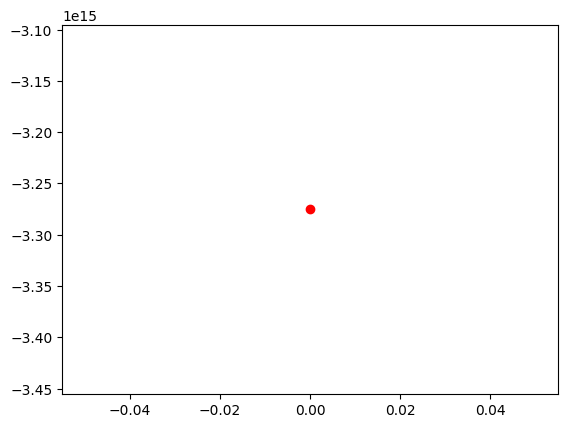

In [244]:
# def vec_by_vec():
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y = np.array([1, 2, 1])
X = np.array([[1, 3, 4], 
              [1, 2, 5], 
              [1, 3, 2]])
print("X:")
print(X)
bias = np.ones(len(X)).reshape(-1, 1)
print("bias:")
print(bias)
X = np.concatenate([bias, X], axis=1)
print("X:")
print(X)
XT_X = X.T @ X
ones = np.ones(len(X)).reshape(-1, 1)
X = np.concatenate([ones, X], axis=1)
X_inv = np.linalg.inv(X.T @ X)
theta_best = X_inv @ X.T @ y
intercept, *coef = theta_best
print("X.T @ X:")
print(XT_X)
print("X_inv:")
print(X_inv)
print("theta_best:")
print(theta_best)
print("intercept, coef:")
print(intercept, coef)
x_values = np.linspace(X.min(), X.max(), 3)
plt.scatter(x=0, y=intercept, c="red")
plt.plot(x_values, x_values * coef + intercept)


4.0 2.0
3.0769230769230766 -0.2692307692307692


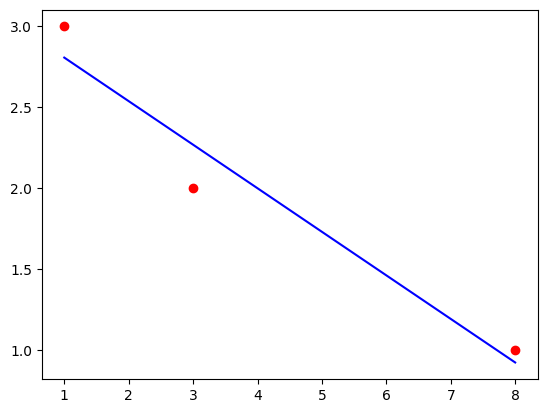

In [187]:
def lin_reg(points: np.ndarray):
  x_mean, y_mean = points.mean(axis=0)
  print(x_mean,y_mean)
  xs, ys = points.T
  b = ((xs - x_mean) * (ys - y_mean)).sum() / ((xs - x_mean)**2).sum()
  a = y_mean - (b*x_mean)
  return a,b

a,b = lin_reg(points)
print(a,b)
xs = points.T[0]
ys = points.T[1]
xxx = np.linspace(xs.min(), xs.max(), 10)
yyy = a + b * xxx
plt.scatter(xs, ys, c="red")
plt.plot(xxx,yyy, c="blue")
# 7 - 4, 1 - 3 -> 3 * -2
# 4^2
# 1 - 4, 5 - 3 -> -3 * 2
# -3^2
# -6 + -6 = -12
# 16 + 9 = 25
# ß = -0.48
# â = 3 - (-0.48 * 4) = 3 - -1.92 
# â = 1.08

In [3]:
# --> 21. What are the properties of cross-entropy loss?
# comes from KL divergence - compares predicted vs true distributions
# CE compares and tries to minimize θ - parameters of the model
# argmin_θ -∑ P(y|x) * log( P(y|x,θ) )
def cross_entropy():
  import numpy as np 
  np.random.seed(42)
  N_preds, N_classes = 3, 3
  P_yx = y_true = np.random.randint(low=0, high=2, size=(10, N_classes)).astype(np.int64)
  y_preds = np.array([np.random.RandomState(i).rand(len(P_yx), N_classes).round(2) for i in range(N_preds)])
  assert all([Q_yx.shape == P_yx.shape for Q_yx in y_preds])
  np.set_printoptions(suppress=True)
  θs = [(-(P_yx * np.log(y_preds[i].clip(min=1e-10,max=1-1e-10))).sum() / len(P_yx)).round(4) for i in range(N_preds)]
  # print(f"Best model is on index {np.argmin(θs)} with θ = {θs[np.argmin(θs)]}")
cross_entropy()

# --> 22. Why do you need Momentum in optimizers? What problem does it solve?
# aggregates several previous gradients: cancel-out if different and boost otherwise
# if aligned (-0.3, -0.4) - speedup, if very different (-0.3, 0.45) - slowdown
from torch.optim.rmsprop import RMSprop
# RMSprop(params=[1], momentum=0)

# --> 23. How does RMSProp work?
# Root Mean Square Propagation exponentially decays learning rate 
# every time the squared gradient is less than a certain threshold
from torch.optim.rmsprop import RMSprop

# --> 24. How does Adam work?
# learning rate / √BCMA(g_j^2) * BCMA(g_j)
# BCMA is short for bias-corrected (exponential) moving average
# "heavy ball", which accelerates immidiatelly, but "rolls" very slowly with "friction"
from torch.optim.adam import Adam

# --> 25. Tell us about cross-validation.
# method for splitting dataset into equi-sized batches
# and iteratively assigning 1 of them (new each time) as test set, others - train set
# then training model and using test set for error check, each time new test set
from sklearn.model_selection import train_test_split


In [2]:
# --> 26. How to get the same results after training the model, provided that the data set and model parameters do not change?
import torch
torch.random.manual_seed(42)


# --> 27. How does RNN work? Why do they exist and what tasks do they perform?
# Reccurent Neural Networks are predecessors to Transformers. RNNs are family of architectures that connect output from previous layer to current layer as part of input.
# e.g.      Brown fox jumped. 
#             |    |   |
# layer:      o1 --|---|
#                  o2--|
#                      o3
# so for cell 3 output will contain info not only about corresponding input, but all previous outputs as well.
def norm_tokens(inpt):
  std, mean = inpt.float().std(), inpt.float().mean()
  inpt = inpt.float() - mean
  inpt /= std
  return torch.sigmoid(inpt)
rnn_layer = lambda token, prev_out: torch.sigmoid(input=token * prev_out)
tokens = torch.tensor([234, 538, 165]) # tokens of "Brown fox jumped" 
in_sentence, result = norm_tokens(tokens), norm_tokens(tokens.reshape(-1, 1))
for word in in_sentence:
  result = rnn_layer(token=word, prev_out=result)


# --> 28. Tell about LSTM and GRU. How do they work and what problems do they solve?
# RNN   - short-term: output result
# LSTM  - (Long Short-term memory)  is RNN + long-term memory.  
#         short-term: output result, long-term: add new input, forget old memories
# GRU   - (Gated Recurrent Unit)    is RNN + long-term memory.  
#         short-term: output result, long-term: update memory
# LSTM solves decaying memory of long connections via long-term memory
# GRU  same as LSTM, but simpler
rnn_layer =   lambda token, prev_out: torch.sigmoid(token * prev_out)
def lstm_layer(token, out, long):
  net = token * out
  long *= torch.sigmoid(net)
  long += torch.sigmoid(net) * torch.tanh(net)
  result = torch.sigmoid(net) * torch.tanh(long)
  return result, long

def gru_layer(token, long):
  reset  = torch.sigmoid(token) * long # reset gate
  long *= torch.sigmoid(token) # update gate
  long += 1 - torch.sigmoid(token) * torch.tanh(token) 
  long += 1 - torch.sigmoid(token) * torch.tanh(reset) 
  return long

# --> 29. Should you use the accuracy metric? Justify your decision.
# there are several metrics, each with its goals:
# precision, recall, accuracy, f1, ROC, AUC, and other more complex ones
# accuracy combaines all of TP, FP, FN, TN into its calculation
# so if you need to measure a tradeoff between precision and recall - use accuracy
# accuracy = ("TP" + "TN") / ("TP" + "FP" + "FN" + "TN")

# --> 30. Tell us about the disadvantages of the F1-measure metric.
# precision = "TP" / ("TP" + "FP")
# recall    = "TP" / ("TP" + "FN")
# F1 = (2 * precision * recall) / (precision * recall)
# precision & recall don't account for TN
# if there's a class imbalance - minority class may be occluded


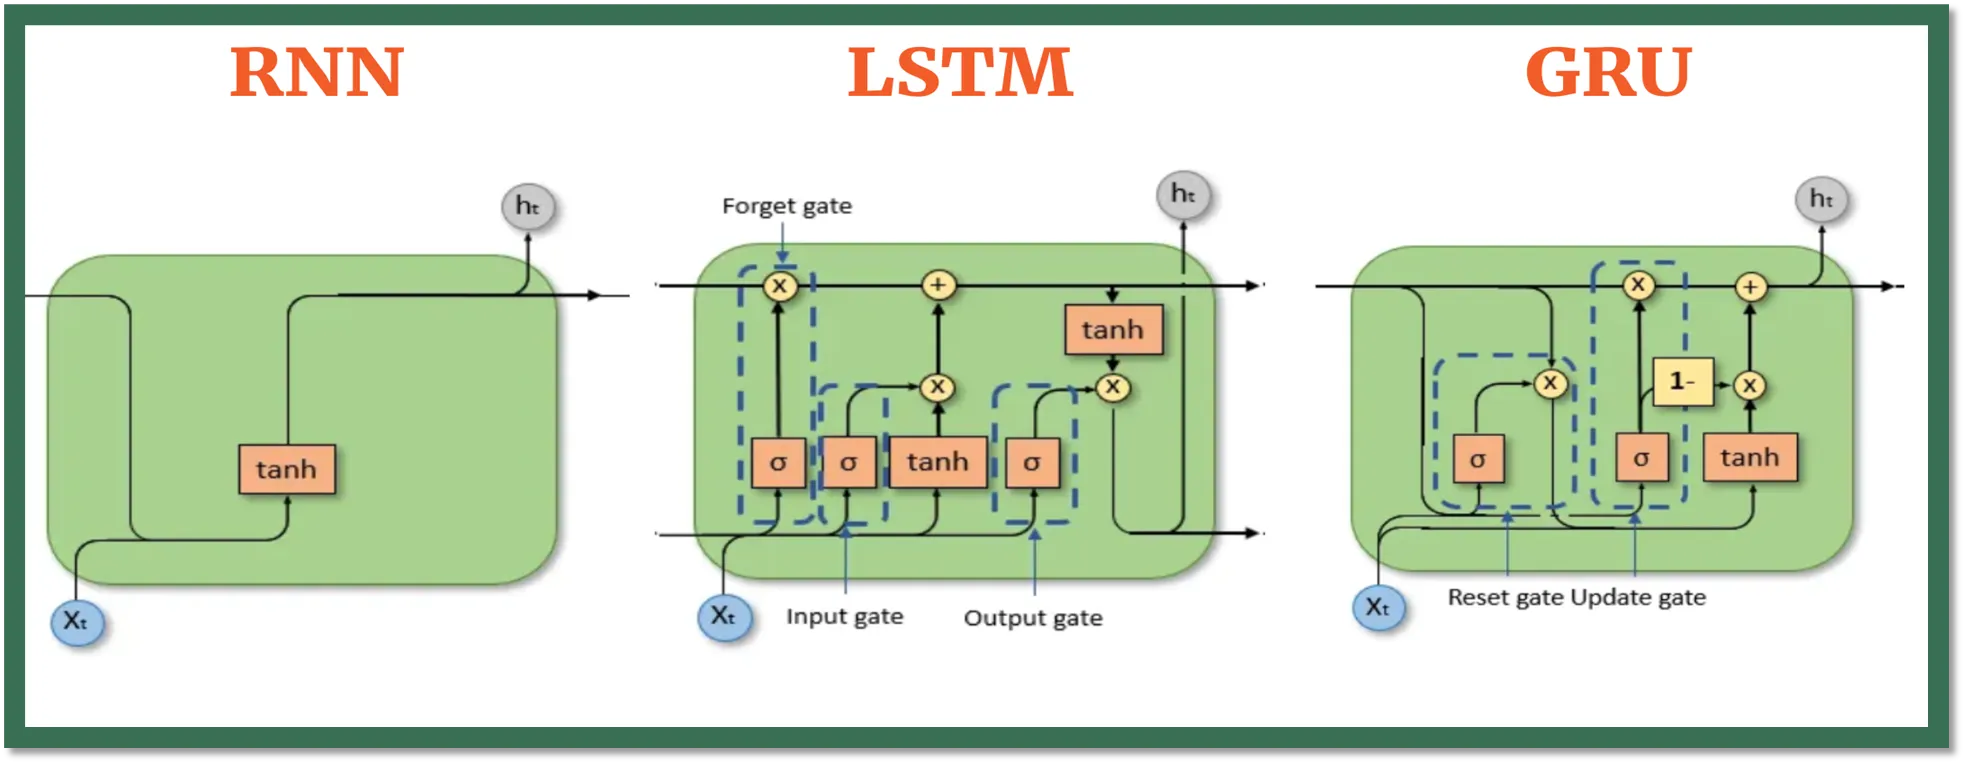

In [77]:
# --> 31. What is ROC, ROC AUC? What is the mathematical interpretation of ROC AUC?
# ROC (reciever operating characteristics) - curve that measures TP / FP with different threasholds
# ROC TP FP graph, AUC is the area under curve  
import numpy as np
import matplotlib.pyplot as plt
roc_max = 11
TP, FP = torch.sigmoid(torch.tensor(range(1, roc_max))), np.array(range(1, roc_max)) / 10
# plt.plot(FP, TP)
# plt.plot(FP, FP * 0.25 + 0.7)

# --> 32. What is a confusion matrix?
# matrix with TP, FP, FN, TN
from sklearn.metrics import confusion_matrix
true_labels, predicted_labels = np.array([1, 0, 1, 0, 1]), np.array([1, 1, 0, 0, 1])
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# print(conf_matrix)

# --> 33. What is an outlier in data?
# outlier is an abnormal value that falls outside 2 std of data distribution.
global_     = [1, 2, 200, 4, 5, 4, 3, 2, 1]
contextual  = [1, 2, 3, 4, 5, 4, 3, 2,    5    ] # (should have been 1)
collective  = [1, 2, 3, 4, 5, 4, 30, 20 ,10]

# --> 34. What is clustering?
# grouping data points together based on similarity metric (usually distance)
# mostly unsupervised
from sklearn.cluster import KMeans
np.random.seed(42)
N = 3
data = np.random.randint(low=0, high=5, size=N*N).reshape(N, -1)
# print(data)
kmeans = KMeans(n_clusters=2, n_init="auto")
# print(kmeans.fit_predict(data))

# --> 35. What is the difference between L1 and L2 regularizations? 
#         What are the properties of weights using different regularizations?
# both penalize irrelevant features with parameter β
# L1 (Lasso) - |β|, rhombus - chooses one and ignores others, and breaks down when all predictors are identical
θ, ɑ = np.array([0.2, 0.7, 0.3]), 0.5 # θ - params, ɑ - regularization coef
L1 = np.square(true_labels - predicted_labels).sum() + ɑ * np.abs(θ).sum()
# L2 (Ridge) - β^2, circle  - good when each feature contributes a little, shrinks coefs of correlated features equally towards zero
L2 = np.square(true_labels - predicted_labels).sum() + ɑ * np.square(θ).sum()
# L1 + L2 (Elastic net)
L1, L2

(2.31, 2.6)

In [47]:
# --> 36. What is the difference between supervised and unsupervised learning?
# supervised learning - needs labeled (y) data (X) to learn dependencies from X to y
# supervised: DecisionTree, Regressions, SVM
# unsupervised - tries to find dependencies in data (X) itself without labels, using metrics and heuristics
# unsupervised: kMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
predicted = RandomForestClassifier().fit(X, y).predict(X)
predicted = KMeans(n_init='auto').fit_predict(X)

# --> 37. How can overfitting be explained? What are the ways to avoid it?
# overfitting is model that was trained too much on same train data and can't generalize to test data
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
DecisionTreeClassifier(random_state=0).fit(X=iris.data, y=iris.target).predict(X=iris.data) # overfit
perc_80 = int(len(iris.data)*0.8)
DecisionTreeClassifier(random_state=0).fit(X=iris.data[:perc_80], y=iris.target[:perc_80]).predict(X=iris.data[perc_80:]) # not overfit


# --> 38. How do you process data gaps?
# imputing or dropping. there are several considerations and approaches:
# if data gaps as rare - you can drop data with missing values.
# otherwise you need to impute: fill with mean, median, backfill, forwardfill, interpolate, build model to fill
import pandas as pd 
import re
df = pd.read_csv('../jobs/data_science_job.csv', encoding='latin1')
# print(df.isna().sum() )# 189 Salaries missing
na_salary_mask = df['Salary'].isna()
k_m_to_zeros = lambda x: re.sub(r'[^\dKM]', '', x).replace('K', '000').replace('M', '000000') if type(x) == str else x
df['Salary'].fillna(df.loc[df['Salary'].notna(), 'Salary'].apply(k_m_to_zeros).astype(int).mean())[na_salary_mask]


# --> 39. State the basic steps in the Machine Learning pipeline.
# 1. clarify requirements, datasources and set milestones with deliverables.
# 2. clean, validate, augment, join data. 
# 3. build regressions betwee features, correlation matrixes, apply PCA if needed and 
# test several basic models like decision trees and polynomial regresssion
# 4. optionally, proceed with deep learning models
# 5. estimate which models behave the best on subset of data and then train best models on full data
# 6. validate predictions and create deliverables: examples, charts, decision logs, predictions
# 7. if required - return to step 3

# --> 40. How to save/load a model so that it can be used using Python?
from sklearn.ensemble import RandomForestClassifier
import torch
# import cPickle
# cPickle(RandomForestClassifier().fit(), file)
deep_model = torch.nn.Sequential(torch.nn.Linear(in_features=28*28, out_features=10, dtype=torch.float64))
torch.save(deep_model.state_dict(), 'model_weights.pth')

# --> 41. How to deal with unbalanced datasets?
# shrink majority classes to minority (bad)
# generate synthetic minority data (bad)
# use stratify to ensure minority class evenly distributed throughout learning (meh)
# Class Weights, metrics, Data Augmentation (images), RandomForest
# from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique
# X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Or frame as an anomaly detection task:
# Z-Score, Box Plot Analysi, Isolation Forest, One-Class SV, Autoencoder, Local Outlier Facto, k-Nearest Neighbor
from sklearn.ensemble import IsolationForest
IsolationForest(contamination=0.05)

# --> 42. What is one-hot encoding and when is it useful?
# one hot encoding is for encoding class labels as sparse matrix of 1 and 0
# it's used when you don't want your model to assume linear relation between classes like (1,2,3,4)
# one hot creates a column for each class - if classes 5 it will add 5 columns like [0,0,1,0,0] (data entry is of class 3)
# when you have some relation between classes (like age groups) - you can encode with 1,2,3,4...
from sklearn.preprocessing import OneHotEncoder
pd.get_dummies(data=df["Experience level"], prefix="level")
OneHotEncoder().fit_transform(df[['Experience level']]).toarray()

# --> 43. Describe the process of data normalization and when it is important.
# data normalization is a technique for fitting data values inside the range of normal distribution
# we don't want one feature to be [0.1...0.9] while the other is [1_000...1_000_000] - model will infer importance incorrectly
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().fit(X)
std_scaler.mean_, std_scaler.scale_, std_scaler.transform(X)[:3]

# --> 44. How do you process categorical data?
# one-hot/label/Ordinal encode it, don't normalize

# --> 45. You have 1000 examples in your data set. What proportions will you use for the train/validation/test distribution? Why?
# it's a very small dataset so I will use cross_validation with 5 folds - it will ensure enough data on training and avoid overfitting
# but the rule of thumb is train_valid: 0.8, test: 0.2 from all; train: 0.8, valid: 0.2 from train_valid
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2) # OR \/
cross_validate(DecisionTreeClassifier(), X, y, cv=5)

{'fit_time': array([0.0002439 , 0.00019503, 0.00019002, 0.00018477, 0.00018287]),
 'score_time': array([0.00019288, 0.00016522, 0.00016189, 0.00016093, 0.00016022]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [ ]:

# --> 46. Why is it important to shuffle the data before training the model?
# so the model doesn't learn unnecessary dependencies in possibly sorted data (by date/region)
from sklearn.utils import shuffle
from sklearn.model_selection import ShuffleSplit
X_train, y_train = shuffle(X_train, y_train)

# --> 47. Can you name the popular cloud platforms for deploying machine learning models and briefly describe their advantages?
# AWS Sagemaker, komprehend (nlp), Tex, vision, ground truth

# --> 48. When creating a dataset for binary classification, you see that one of the classes outnumbers the other by 9:1. Your actions?
# shrink majority classes to minority (bad)
# generate synthetic minority data (bad)
# use stratify to ensure minority class evenly distributed throughout learning (meh)
# Class Weights, metrics, Data Augmentation (images), RandomForest
# from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique
# X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# --> 49. Can you describe the difference between classification and regression in machine learning?
# regression learns dependencies in data with multiple dimensions (features), 
# while classification - learns what distinguishes targets based on features
# however we can draw line that represents data as well as separates data into classes 
# and thats why we have DecisionTreeCls/DecisionTreeReg, SVM/SVR

# --> 50. What role does feature engineering play in machine learning, can you give an example?
# remove/supress correlated features, outliers and anomalies

MLOps

In [ ]:

# --> 51. What is MLOps and why is it important in machine learning projects?
# all about how and where model is hosted/trained/tuned and how frequently it's re-deployed
# import sagemaker
# from sagemaker.pytorch import PyTorch
# bucket, prefix = 's3-bucket', 's3-prefix' # input data location
# estimator = PyTorch(entry_point='training_script.py', # training job
#           role=sagemaker.get_execution_role(),
#           framework_version='1.8.1',
#           py_version='py3',
#           instance_count=1,
#           instance_type='ml.m5.small',
#           output_path=f's3://{bucket}/{prefix}/output',
#           sagemaker_session=sagemaker.Session())
# input_data = sagemaker.inputs.TrainingInput(s3_data=f's3://{bucket}/{prefix}/data')
# estimator.fit({'train': input_data})
# predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

# --> 52. Have you worked with version control systems like Git in a machine learning project? How did it contribute to the project?
# yes, know which pickle and pt files to commit and which not to

# --> 53. Can you explain the concept of continuous integration (CI) and continuous deployment (CD) in the context of machine learning?
# model performance metrics testing, training data management, 

## DOING

Deep Learning

In [3]:

# 54. What network architectures for classification tasks do you know?
# 55. What is transfer learning and when should it be used?
# 56. What models have you worked with? Tell us about their features and innovations.
# 57. What is the activation function for in neural networks?
# 58. How is the initial initialization of weights in neural networks? Why can't it be zero?
# 59. Why is a batch norm needed? What are alpha, beta responsible for? What will happen if they are taken away?
# 60. What is dropout? How does he behave on the trainee and on the test?
# 61. How would you convert time data into a numeric format?


## TODO

Algorithms 

In [4]:

# 62. What types of machine learning problems do you know?
# 63. Describe the work algorithm of Support Vector Machines.
# 64. List the main data structures, their pros and cons.
# 65. What conditions must be met for the application of the law of large numbers?
# 66. What is the difference between Type I and II errors?


Python

In [5]:

# 67. What is closure?
# 68. What dunder methods exist?
# 69. What are decorators?
# 70. What does property mean? How to implement it?
# 71. What class packages for data storage do you know? What are their advantages and disadvantages (dataclass, attrs, pydantic)?
# 72. What packages do you know for storing and processing tabular data? What are their advantages and disadvantages (pandas, polars)?



Computer Vision


In [6]:

# 73. How Canny Edge Detection works in OpenCV, use the example to calculate the pass of an arbitrary filter, such as a Sable filter, on an image.
# 74. What is augmentation?


### Additional

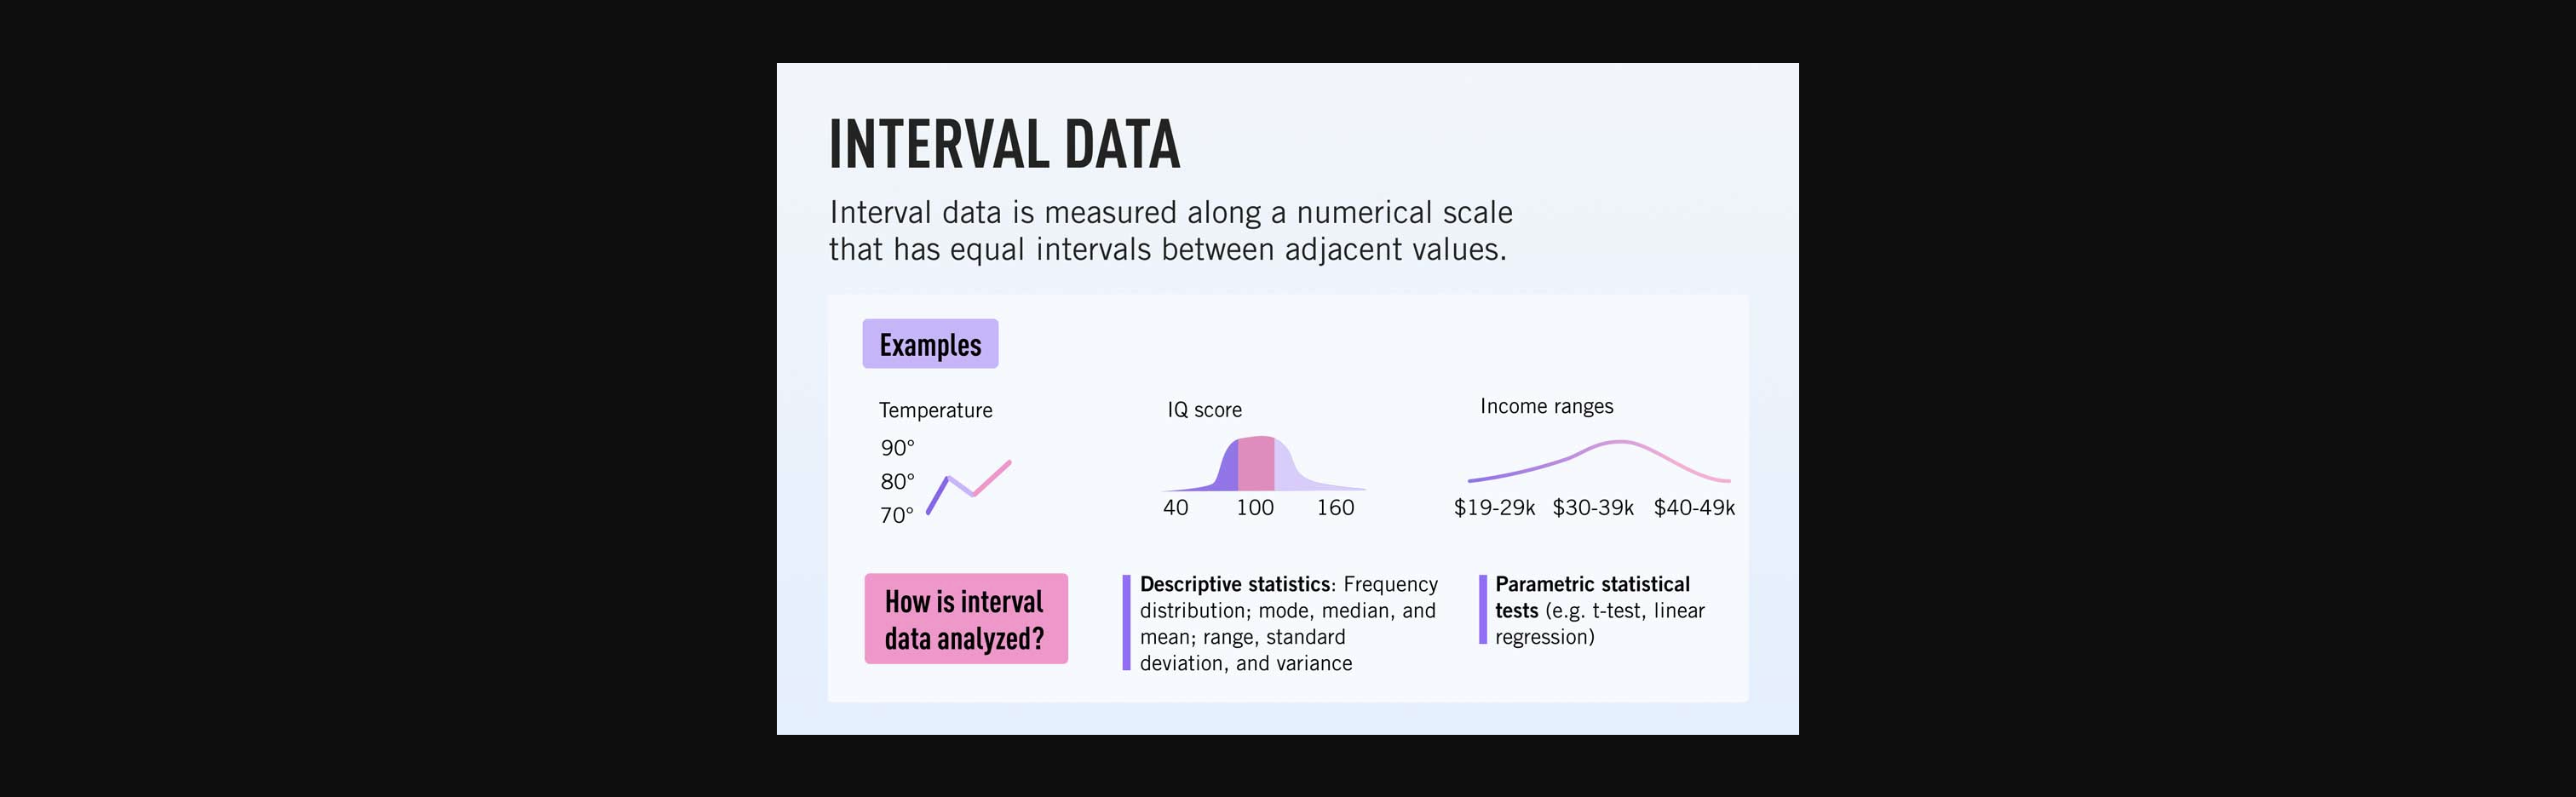

# <h1 style="display:flex; justify-content:center; font-size: 40px">🎩 MIDDLE</h1>

## TODO

1. What was the last paper you read?
2. How do you evaluate the performance of a machine learning model? What metrics do you use for regression and classification tasks? Briefly describe their advantages.

Machine Learning

3. How do you choose the type of classifier based on the training set data size?
4. Explain the gradient descent method. How to choose the learning rate for a gradient descent optimization algorithm?
5. How will you solve the problem of text classification if you have an unbalanced dataset?
6. How to correctly do cross-validation on time-series?
7. Batch vs Mini-batch: What's the difference and when is it better to use?
8. What are the types and sources of data leakage? Give examples of each type and how to avoid them.
9. Tell the main concepts of doing gradient boosting. How is XGBoost different from LightGBM?
10. How do Conv-LSTM and Conv-GRU work? How are they different from LSTM and GRU?
11. What are the methods for training models on imbalanced datasets? What are their advantages and disadvantages?
12. If you have many features in your dataset, how will you select/remove them for modeling?
13. Suggest a metric that would reflect how confident a model is in a prediction?
14. Why is it necessary to use batches during training? Will the largest batch size always lead to the best result 
15. How to choose the value of K for the K-means algorithm?
16. What is stratification? Why is it in test/validation datasets?
17. Have you implemented or used a Machine Learning pipeline? If so, please describe its components and advantages.
18. What classes from the sklearn library may be needed during data preparation?
19. What is the name of the process in which a characteristic (feature) contained in a training data set is not expected to be available at the time of prediction?
20. When creating characteristics, you received a data set that contains 575 columns. Should I add the entire dataset to training? If not, what are your next steps? If so, how would your approach change if, say, there were 57,575 columns?
21. What approaches to converting text data into numbers do you know?

Model Building and Evaluation 

22. Describe the difference between algorithms based on the type of decision trees, SVM, and random forests?
23. Explain why hyperparameter tuning is needed, describe some approaches.
24. What is the difference between bagging and boosting?
25. How would you work with time series data?

Deep Learning

26. What are autoencoders? What tasks are they used for?
27. What is the vanishing gradient problem? How can it affect learning? Describe the methods used to avoid this problem.
28. Explain the mechanism of attention.
29. What is distillation in ML and why is it used? Explain the main idea of ​​distillation.
30. How to add dropout in LSTM?
31. What approaches, models, metrics are used for the ranking task?
32. What ways of reducing the need for data do you know?
33. How exactly do you choose which models to work with?
34. What methods of optimizing the speed of models do you know?
35. What is the Quantization-aware training method and how does it work?
36. Tell us about the principle of operation of transformers.
37. Why can't we use second-order optimizers for Deep Learning problems?
38. What problem does Cycle Policy solve? What is One Cycle?
39. How to select LR values ​​for training?
40. What are skip-connections in neural networks and why are they there?

MLOps

41. Name the best practices for model versioning.
42. Tell us about the concept of data shifts. How can it be detected?43.Have you worked with containerization technologies such as Docker? Please describe your experience.
44. Have you worked with container orchestration systems like Kubernetes? Please describe your experience.
45. How do you manage versioning and model tracking in a collaborative environment?
46. ​​Explain the role of feature stores and data versioning in machine learning operations.
47. Explain the advantages and challenges of using a serverless architecture to deploy machine learning models in the cloud.

Computer Vision

48. Describe the architecture of FasterRCNN and YOLO. What is the difference between them?
49. What is the difference between one-stage and two-stage object detector? What are the pros and cons of each?
50. Tell how the mAP metric is calculated for the Object Detection task? What is an IOU?
51. Tell me how MS COCO mAP@IOU=0.5:0.95:0.05 is calculated? What is the advantage of the metric over VOC Pascal mAP?
52. How to speed up the object detection model?53.Tell me how U-Net works?
54. What metrics are used for segmentation? Dice, IOU?
55. Why do you need a discriminator in GAN? What if the discriminator is perfect?
56. Tell us about ProgressGAN. How to use it to generate high quality images with details?
57. Tell us about Cycle GAN. How can it be used to solve the problem when there is no exact match between the input and output images?
58. Tell us about StyleGAN. How to use it to generate an image with the desired style?
59. What metrics are used to check the quality of GANs?
60. Is it possible to create a classifier for 100 thousand classes? Justify your opinion.
61. Tell us about Triplet loss? What are the disadvantages?
62. Why are features projected onto a sphere in Re-ID?
63. Tell us about the CosFace function? Why is it used and what are its benefits for Re-ID?
64. Tell us about the VGG architecture? What are its features? What was the latest presented in it at the time?
65. Tell us about Skip Connection in ResNet architecture? What problem does it solve?
66. Tell us about depth-wise separable convolution in MobileNet architecture? What role does he play?67.Tell us about RELU6 in MobileNet architecture? What role does he play?
68. Tell us about the inverted residual block in the MobileNet v2 architecture? How is it arranged?
69. Tell us about Inception Block? How is it arranged in Inception, Inception V2, Inception V3 architectures? Why exactly this architecture?
70. What is NAS?
71. Tell us about the EfficientNet architecture. What are the technical decisions behind the choice of parameters for the architecture?
72. Tell me how Knowledge Distillation works? What is NoisyStudent Networks?
73. Tell us how Prunning works in neural networks? What are its advantages and disadvantages?
74. What is the difference between Pruning by weight and by curls? What are their advantages and disadvantages?
75. Tell us about quantization. What is the difference between per-channel and per-tensor?
76. Why do label smoothing for classification?
77. Tell us about ViT? What is a token?
78. What is the difference between working with pictures and videos? What are the challenges of working with video?79.Do you need all the frames from the video? How to choose them?
80. How do video compression algorithms work? H264 codec?
81. What problems can CV solve?
82. What types of image preprocessing do you know?
83. What is SIFT, SURF?84.What is the difference between object detection and tracking?
85. What is semantic segmentation (Semantic segmentation)?
86. How do image-to-text conversion models work?
87. How do generative models (for example, DALL-E) work?
88. You have the task of creating an X-ray image analysis assistant. What will be your steps?

Algorithms 

89. Explain the difference between recursion and iteration in a programming context. When is it better to use one approach or the other?

NLP

90. What frameworks for NLP are you familiar with?
91. What is Syntactic Analysis?
92. What is lemmatization and stemming? What are they used for?
93. What are BoW, TF-IDF, BM25 and where are they used?
94. What is tokenization? What types of it do you know?
95. What is word2vector? What does "sentence to a vector" mean? Where is this concept used?96.Why are word embeddings derived from transformers better than classic word2Vec?
97. How would you solve the problem of analyzing tweets by emotional color? You have two options: a modern approach (LLMs) or building your own system from scratch.
98. What is explainable ML? How to use the approach to make a black-box a gray one?
99. If you implemented dropout and batch normalization for a neural network? When does it matter?

Manufacturing

100. What factors must be considered when deploying a model?
101. How will you track a machine learning model?
102. How can a model be configured to handle a concept change after it has been deployed?

Python

103. What ML frameworks do you know and can use? Tell us about the most successful project completed on each of these frameworks (at least TensorFlow, PyTorch, scikit-learn).


# <h1 style="display:flex; justify-content:center; font-size: 40px">👑 Senior</h1>

## TODO

1. How to understand that a project should be solved by ML?2.When should you use ML and when should you not?
3. What are the prerequisites for a successful ML project?
4. What is a successful ML project?5.Describe the challenges of deploying machine learning models in production, including monitoring and maintenance.
6. How do you handle privacy and ethical issues when working with sensitive data in machine learning projects?
7. What are the trends and new technologies in the field of machine learning and artificial intelligence?
8. Can you provide an example of a complex real-world machine learning project, detailing your role and contribution.
9. Describe your experience designing and implementing complex machine learning workflows with MLOps best practices, including data ingestion, model training, and cloud deployment.

Machine Learning

10. Give an example of best practices for selecting hyperparameters.
11. What are the stages of ML project development?
12. How to interpret model predictions? What methods of interpretation do you know? What are their disadvantages and advantages?
13. How to detect outliers in the input data of the classifier? How can this be done without retraining the model or clustering?
14. How to ensure data privacy and anonymity?
15. How to avoid bias (for example, race or gender) in a model caused by the data set on which it is trained?
16. In the case of training sequential models (LSTM, Transformer-based, etc.), how to solve the problem of unevenness of sequences, when one is longer than the other?
17. What automatic algorithms for reducing the dimensionality of characteristics do you know?
18. How to explain the influence of one or another characteristic on the result of the model? What algorithms exist for this?
19. What is real time training and what problems is this approach designed to solve?
20. What approaches to multithreaded model training do you know and how do they differ?
21. How would you approach a large-scale distributed machine learning project?22.Discuss the challenges and possible solutions when working with time series, tabular, text, or images (choose one type of data based on experience) for machine learning applications.
23. What are First Type Error and Second Type Error?
24. How to form criteria for choosing the best model from all trained models and how to explain this choice to non-technical colleagues?
25. How to ensure reproducibility of model training when working in a large team?

Deep Learning

26. Tell us about your experience using various deep learning frameworks.27.Do you think L2 regularization works better for NN?
28. What is metrics learning? How is it different from classification? What are the basic loss functions used?
29. Describe adversarial attacks in deep learning and possible defenses against them.
30. What are the main techniques used when training deep learning models and what are their practical benefits?

MLOps

31. Draw a diagram of a recommender system for YouTube.32.Explain the main stages of the model life cycle in MLOps.
33. How can MLOps be configured for models deployed on edge devices?
34. How to measure model degradation?
35. Name the best practices for managing package dependencies and environments for ML models.
36. What methods of monitoring the quality of models in production do you know? Which ones did you use?

NLP

37. Explain how model quantization works using LoRa as an example.
38. The LLM fine-tuning process often requires labeled data, which can be expensive to obtain. How can we reduce the need for large labeled datasets when fine-tuning LLM?
39. How can LLM be used to create a wiki from project code? How to deal with hallucinations?
40. Where can you use Explainable AI (XAI) in NLP?
41. What are the methods of improving the quality of LLM embeddings?

Algorithms 

42. Which of the two algorithms XGBoost and Random Forest can be parallelized and why?
43. What is a cold start problem? How to cope with it?
44. What is concept drift?
45. What is model drift?

Computer Vision

46. Where can Explainable AI (XAI) be used in CV?
47. What is hard negative mining and how is it used in object detection?
48. Why does transfer learning from the task of object detection to the task of segmentation work poorly?
49. What is an anchor in object detection? Tell us about anchor-free approaches.
50. How to perform the task of instance segmentation using models for semantic segmentation?
51. How do TensorRT and OpenVINO frameworks optimize meshes?
52. Tell us about the ConvNeXt architecture.
53. How to optimize algorithms that work on a video stream?